In [1]:
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [2]:
train_df = pd.read_csv('DataStrom6.0-analyis/train_numerical_columns.csv')

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15308 entries, 0 to 15307
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   agent_code                                    15308 non-null  int64  
 1   month                                         15308 non-null  int64  
 2   quarter                                       15308 non-null  int64  
 3   year                                          15308 non-null  int64  
 4   cluster                                       15308 non-null  int64  
 5   agent_age                                     15308 non-null  int64  
 6   new_policy_count                              15308 non-null  int64  
 7   agent_seniority                               15308 non-null  int64  
 8   time_to_first_sale_months                     15308 non-null  int64  
 9   ANBP_value_boxcox_added                       15308 non-null 

In [4]:
train_df.describe()

,agent_code,month,quarter,year,cluster,agent_age,new_policy_count,agent_seniority,time_to_first_sale_months,ANBP_value_boxcox_added,net_income_boxcox_added,number_of_policy_holders_boxcox_added,number_of_cash_payment_policies_boxcox_added,pca_proposal_1,pca_proposal_2,pca_quotations_1,pca_quotations_2,pca_customers_1,pca_customers_2
count,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000,15308.000000
mean,448.550692,4.769728,1.272733,0.442971,1.297100,40.585772,20.269990,29.380259,23.034165,344.256016,236.542889,7.805430,17.021351,0.501111,0.498003,0.497474,0.571216,0.498584,0.499765
std,260.609670,3.168050,1.035729,0.496753,0.915406,11.688204,9.541693,16.510712,15.256349,156.051558,76.710968,4.863785,8.937522,0.229925,0.207860,0.184198,0.181782,0.165130,0.164264
min,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,1.000000,-3.000000,0.000000,34.029528,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,226.000000,2.000000,0.000000,0.000000,1.000000,31.000000,15.000000,15.000000,10.000000,266.296950,182.826319,5.087706,10.803141,0.308158,0.330834,0.366674,0.438223,0.380714,0.383034
50%,445.000000,5.000000,1.000000,0.000000,1.000000,41.000000,21.000000,29.000000,22.000000,376.080488,239.053160,8.485549,17.737690,0.501357,0.499258,0.494930,0.575734,0.498615,0.499317
75%,674.000000,7.000000,2.000000,1.000000,2.000000,51.000000,27.000000,43.000000,35.000000,458.049115,291.031431,11.537934,23.743937,0.693679,0.663220,0.622466,0.710212,0.617161,0.615560
max,904.000000,11.000000,3.000000,1.000000,3.000000,60.000000,42.000000,64.000000,60.000000,638.869165,453.339098,18.672449,38.948531,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(train_df.isnull().sum())
print(train_df.duplicated().sum())
print(train_df.nunique())

agent_code                                      0
month                                           0
quarter                                         0
year                                            0
cluster                                         0
agent_age                                       0
new_policy_count                                0
agent_seniority                                 0
time_to_first_sale_months                       0
ANBP_value_boxcox_added                         0
net_income_boxcox_added                         0
number_of_policy_holders_boxcox_added           0
number_of_cash_payment_policies_boxcox_added    0
pca_proposal_1                                  0
pca_proposal_2                                  0
pca_quotations_1                                0
pca_quotations_2                                0
pca_customers_1                                 0
pca_customers_2                                 0
dtype: int64
0
agent_code                         

In [6]:
train_df['is_nill'] = (train_df['new_policy_count'] == 0).astype(int)

In [7]:
X = train_df.drop(columns=['is_nill'])
y = train_df['is_nill']

In [8]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(f"Original dataset shape: {X.shape}, {y.shape}")
print(f"Resampled dataset shape: {X_resampled.shape}, {y_resampled.shape}")

Original dataset shape: (15308, 19), (15308,)
Resampled dataset shape: (3060, 19), (3060,)


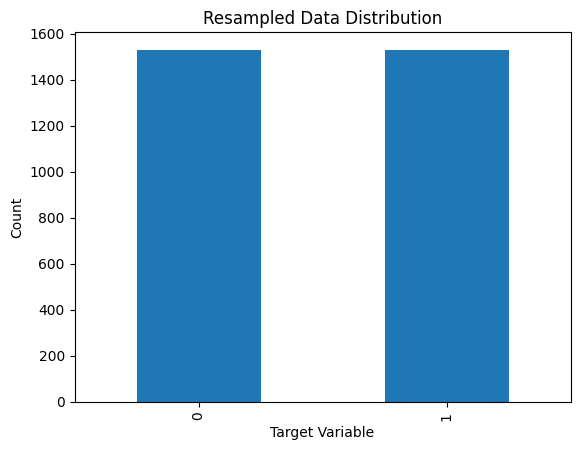

In [9]:
# plot bar graph the resampled data
y_resampled.value_counts().plot(kind='bar')
plt.title('Resampled Data Distribution')
plt.xlabel('Target Variable')
plt.ylabel('Count')
plt.show()

In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train_scaled, y_resampled, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3],
    'lambda': [0, 1, 10],
    'alpha': [0, 1, 10]
}

In [18]:
grid_search = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=2,
    n_jobs=-1 , 
    verbose=1
)

In [19]:

grid_search.fit(X_train, y_train)


Fitting 2 folds for each of 4374 candidates, totalling 8748 fits


GridSearchCV(cv=2,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'alpha': [0, 1, 10],
                         'colsample_bytree': [0.7, 0.8, 1.0],
                         'gamma': [0, 0.1, 0.3], 'lambda': [0, 1, 10],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy', verbose=1)

In [20]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'alpha': 0, 'colsample_bytree': 0.7, 'gamma': 0, 'lambda': 0, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}


In [ ]:
from sklearn.model_selection import cross_val_score

model = XGBClassifier(
    # tree_method='gpu_hist',
    # predictor='gpu_predictor',
    # gpu_id=0,
    learning_rate=0.01,
    max_depth=3,
    n_estimators=50,
    subsample=0.8,
    random_state=42,
    colsample_bytree= 0.7
)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.01, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
scores = cross_val_score(model, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Cross-Validation Accuracy:", scores.mean())

Scores: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Cross-Validation Accuracy: 1.0


In [32]:
y_pred_test = model.predict(X_test)
y_proba_test = model.predict_proba(X_test)[:, 1]

In [33]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

Confusion Matrix:
[[313   0]
 [  0 299]]


In [34]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test, zero_division=0))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       313
           1       1.00      1.00      1.00       299

    accuracy                           1.00       612
   macro avg       1.00      1.00      1.00       612
weighted avg       1.00      1.00      1.00       612



ROC AUC: 1.00


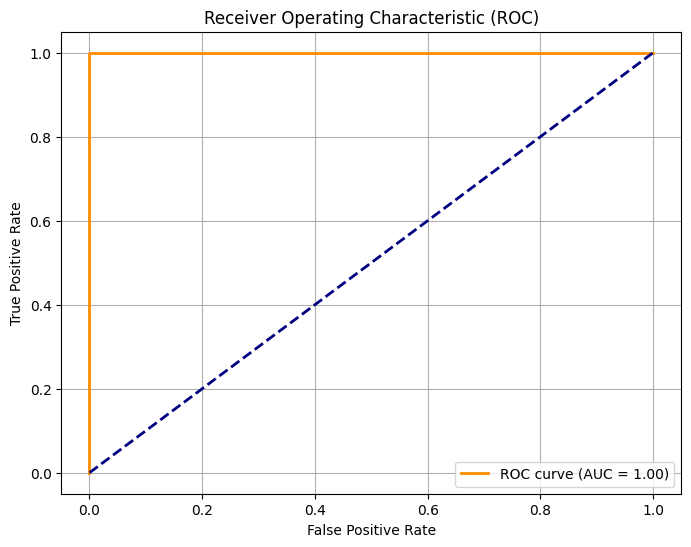

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = roc_auc_score(y_test, y_proba_test)
print(f"ROC AUC: {roc_auc:.2f}")

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

### validate

In [36]:
test_df = pd.read_csv('DataStrom6.0-analyis/test_numerical_columns.csv')

row_ids = range(1, len(test_df) + 1)

X_val_scaled = scaler.fit_transform(test_df)
X_val_scaled = scaler.transform(X_val_scaled)

y_pred_val = model.predict(X_val_scaled)
y_proba_val = model.predict_proba(X_val_scaled)[:, 1]

c:\Users\GIHAN LAKMAL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [37]:
target = (test_df['new_policy_count'] == 0).astype(int)
# want the count of the 0s and 1s
print("Target counts in test set:")
print(target.value_counts())

Target counts in test set:
new_policy_count
0    820
1     94
Name: count, dtype: int64


In [38]:
# check the accuracy 
print("Accuracy on test set:")
print(model.score(X_val_scaled, target))
print("Confusion Matrix:")
print(confusion_matrix(target, y_pred_val))
print("\nClassification Report:")
print(classification_report(target, y_pred_val, zero_division=0))

Accuracy on test set:
0.8971553610503282
Confusion Matrix:
[[820   0]
 [ 94   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       820
           1       0.00      0.00      0.00        94

    accuracy                           0.90       914
   macro avg       0.45      0.50      0.47       914
weighted avg       0.80      0.90      0.85       914



In [40]:
import pandas as pd

submission_df = pd.DataFrame({
    'row_id': row_ids,
    'one_month_nill': y_pred_val  
})

# Step 3: Save to CSV
submission_df.to_csv('new_submission.csv', index=False)

print("Submission file 'submission.csv' created successfully!")

Submission file 'submission.csv' created successfully!
